In [3]:
from astropy.table import Table
import numpy as np

tab = Table.read("VII_80_sources.dat.fits")

In [4]:
sort_indx = np.flip(np.argsort(np.array(tab['flux'])))

flux = np.array(tab['flux'])[sort_indx]
name = np.array(tab['name'])[sort_indx]
glon_deg = np.array(tab['GLON'])[sort_indx]
glat_deg = np.array(tab['GLAT'])[sort_indx]
ra_deg = np.array(tab['RAdeg'])[sort_indx]   # note that this is J1950
dec_deg = np.array(tab['DEdeg'])[sort_indx]

Text(0, 0.5, 'Flux (ct/cm$^2$/sec)')

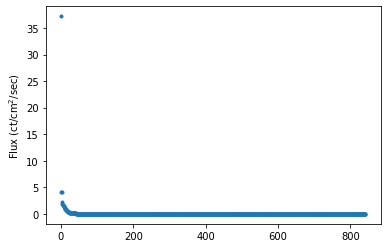

In [5]:
import matplotlib.pyplot as plt

plt.plot(flux, '.')
plt.ylabel(r"Flux (ct/cm$^2$/sec)")

In [6]:
flux_list = [1, 0.75, 0.5, 0.25, 0.1, 0.05]
num_source_list = []

for f_target in flux_list:
    num = len(np.where(flux>f_target)[0])
    num_source_list.append(num)

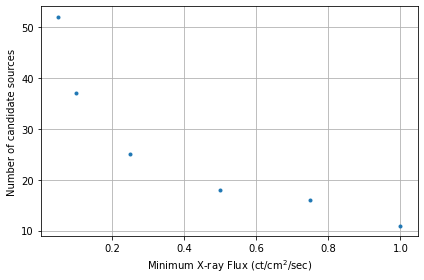

In [160]:
plt.plot(flux_list, num_source_list, '.')
plt.xlabel(r"Minimum X-ray Flux (ct/cm$^2$/sec)")
plt.ylabel("Number of candidate sources")
plt.grid()
plt.tight_layout()
# plt.savefig("Brightest-Xray-Stars.png", dpi=300)

# This plot says that there are 52 sources with more than 0.05 ct/cm^2/sec and 11 sources with more than 1 ct/cm^2/sec

In [117]:
# create a table for number of X-ray sources with a certain flux
import pandas as pd

df = pd.DataFrame(np.column_stack((flux_list, num_source_list)), columns=["X-ray Flux (ct/cm^2/sec)", "Number of Sources"])
df

,X-ray Flux (ct/cm^2/sec),Number of Sources
0,1.00,11.0
1,0.75,16.0
2,0.50,18.0
3,0.25,25.0
4,0.10,37.0
5,0.05,52.0


In [95]:
min_flux = 0.125   # this defines the number of N brightest sources used in the plots below
n_indx = np.where(flux>min_flux)[0]

Text(0.5, 0, "n'th brightest source")

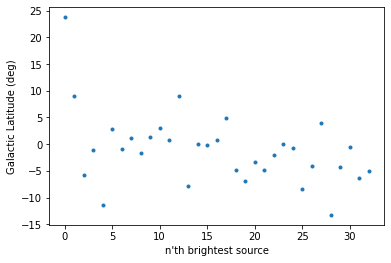

In [14]:
plt.plot(glat_deg[n_indx], '.')
plt.ylabel("Galactic Latitude (deg)")
plt.xlabel("n'th brightest source")

Text(0, 0.5, 'Number of Sources')

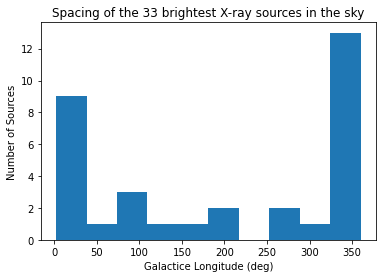

In [15]:
plt.hist(glon_deg[n_indx])
plt.title(f"Spacing of the {len(n_indx)} brightest X-ray sources in the sky")
plt.xlabel("Galactice Longitude (deg)")
plt.ylabel("Number of Sources")

Text(0.5, 0, "n'th brightest source")

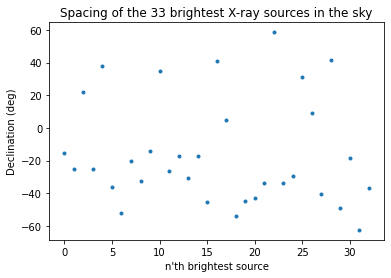

In [16]:
plt.title(f"Spacing of the {len(n_indx)} brightest X-ray sources in the sky")
plt.plot(dec_deg[n_indx],'.')
plt.ylabel("Declination (deg)")
plt.xlabel("n'th brightest source")

Consider the distribution of sources for an equatorial orbit with a certain value of Rstar

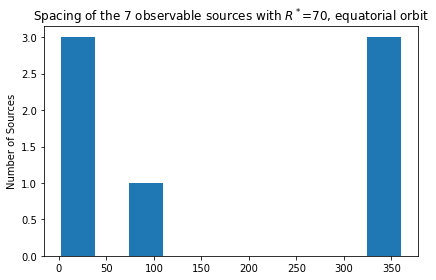

In [111]:
def theta_max(Rstar):
    return np.rad2deg(np.arcsin(1/Rstar))

Rstar = 70
# Use dec_deg for an equatorial orbit and glat_deg for an orbit in the galactic plane
candidate_indices = np.where(np.abs(glat_deg[n_indx])<theta_max(Rstar))[0]
plt.hist(glon_deg[candidate_indices])
plt.title(fr"Spacing of the {len(candidate_indices)} observable sources with $R^*$={Rstar}, equatorial orbit")
plt.ylabel(f"Number of Sources")  # (brighter than {min_flux} ct/cm$^2$/sec)
plt.tight_layout()
# plt.savefig("HC-Source-Spacing-LEO.png", dpi=300)

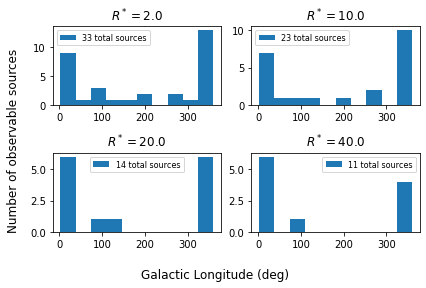

In [115]:
fig, ax = plt.subplots(2, 2)

Rstars = np.array([[2, 10], [20, 40]])
for i in range(0, 2, 1):
    for  j in range(0, 2, 1):
        candidate_indices = np.where(np.abs(glat_deg[n_indx])<theta_max(Rstars[i,j]))[0]
        ax[i,j].hist(glon_deg[candidate_indices], label=f"{len(candidate_indices)} total sources")
        ax[i,j].set_title(rf"$R^*=${Rstars[i,j]:.1f}")
        ax[i,j].legend(prop={'size': 8})
fig.supxlabel("Galactic Longitude (deg)")
fig.supylabel(f"Number of observable sources")
fig.tight_layout()
# plt.savefig("/Users/nathanielruhl/Desktop/HC-candidates-GE-Orbit.png", dpi=300)